In [46]:
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

from feature_engine.discretisation import EqualFrequencyDiscretiser

In [47]:
X,y = fetch_openml(name='house_prices', version=1, return_X_y=True, as_frame=True)

In [48]:
X.set_index('Id',inplace=True)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [50]:
TARGET_NUMERIC_FEATURES= ['LotArea','GrLivArea']
disc = EqualFrequencyDiscretiser(q=10, variables=TARGET_NUMERIC_FEATURES, return_boundaries=True)

In [51]:
disc.fit(X_train)

EqualFrequencyDiscretiser(return_boundaries=True,
                          variables=['LotArea', 'GrLivArea'])

In [52]:
disc.binner_dict_

{'LotArea': [-inf,
  5000.0,
  7105.6,
  8099.200000000003,
  8874.0,
  9600.0,
  10318.400000000001,
  11173.5,
  12208.2,
  14570.699999999999,
  inf],
 'GrLivArea': [-inf,
  918.5,
  1080.4,
  1218.0,
  1348.4,
  1476.5,
  1601.6000000000001,
  1717.6999999999998,
  1893.0000000000005,
  2166.3999999999996,
  inf]}

In [53]:
disc.q

10

In [54]:
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

In [55]:
train_t[TARGET_NUMERIC_FEATURES].head()

,LotArea,GrLivArea
Id,,
136,"(10318.4, 11173.5]","(1601.6, 1717.7]"
1453,"(-inf, 5000.0]","(918.5, 1080.4]"
763,"(8099.2, 8874.0]","(1476.5, 1601.6]"
933,"(11173.5, 12208.2]","(1893.0, 2166.4]"
436,"(10318.4, 11173.5]","(1601.6, 1717.7]"


In [56]:
X_train[TARGET_NUMERIC_FEATURES].head()

,LotArea,GrLivArea
Id,,
136,10400,1682
1453,3675,1072
763,8640,1547
933,11670,1905
436,10667,1661


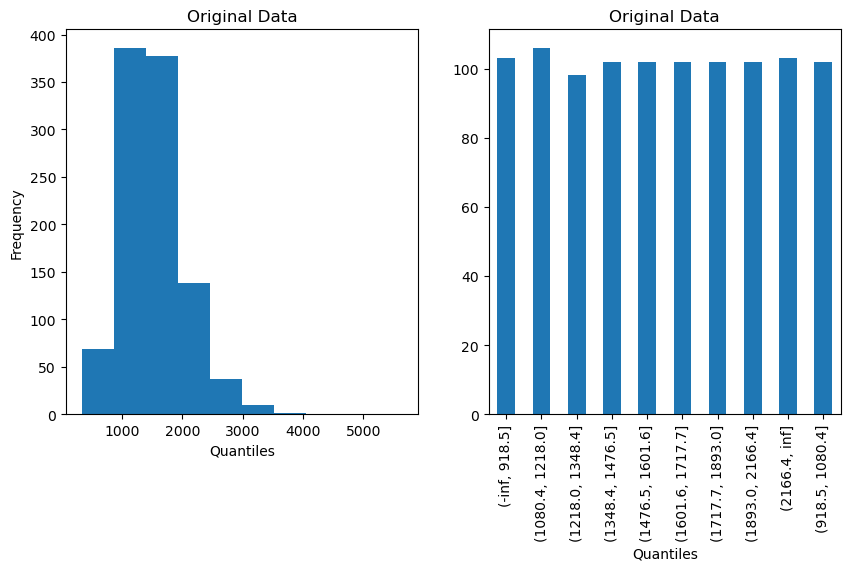

In [57]:
fig, axes= plt.subplots(ncols=2,figsize=(10,5))
X_train['GrLivArea'].plot.hist(bins=disc.q,ax=axes[0])
axes[0].set_title('Original Data')
axes[0].set_xlabel('Quantiles')

# train_t['GrLivArea'].plot.hist(bins=disc.q,ax=axes[1])
train_t['GrLivArea'].value_counts().sort_index().plot.bar(ax=axes[1])
axes[1].set_title('Original Data')
axes[1].set_xlabel('Quantiles')

plt.show()

## Binning skewed Data

In [58]:
import numpy as np
import pandas as pd

In [59]:
data = pd.DataFrame({
    'feature1':np.random.normal(loc=0,scale=1,size=1000),
    'feature2':np.random.exponential(scale=1,size=1000)
})
data

,feature1,feature2
0,-0.416033,1.230631
1,0.553738,1.588693
2,0.553089,0.216286
3,-0.538518,0.651896
4,-1.924106,0.514525
...,...,...
995,0.140166,1.833350
996,1.342030,0.234065
997,1.019079,0.571425
998,-1.485097,0.698385


In [62]:
disc=EqualFrequencyDiscretiser(q=5)
disc.fit(data)

EqualFrequencyDiscretiser(q=5)

In [63]:
t=disc.transform(data)

In [69]:
t

,feature1,feature2
0,1,3
1,3,4
2,3,1
3,1,2
4,0,2
...,...,...
995,2,4
996,4,1
997,4,2
998,0,2


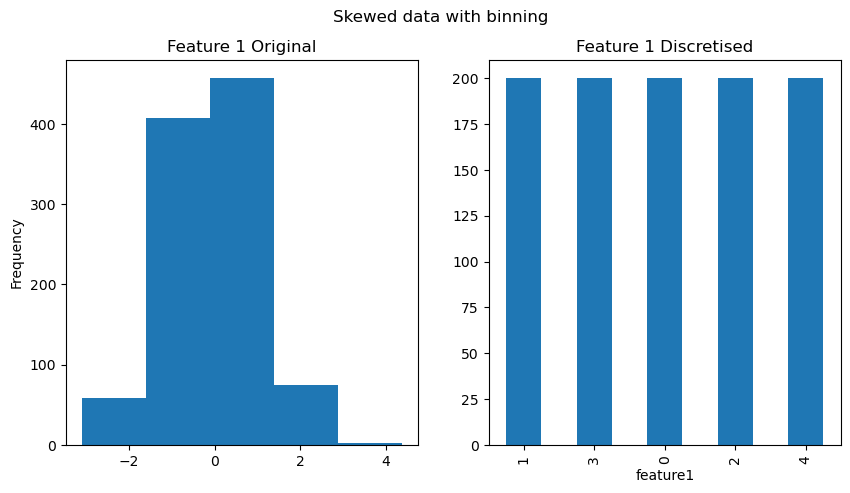

In [70]:
fig, ax=plt.subplots(figsize=(10,5),ncols=2)

data['feature1'].plot.hist(bins=disc.q,ax=ax[0])
ax[0].set_title('Feature 1 Original')

t['feature1'].value_counts().plot.bar(ax=ax[1])
ax[1].set_title('Feature 1 Discretised')

plt.suptitle('Skewed data with binning')
plt.show()

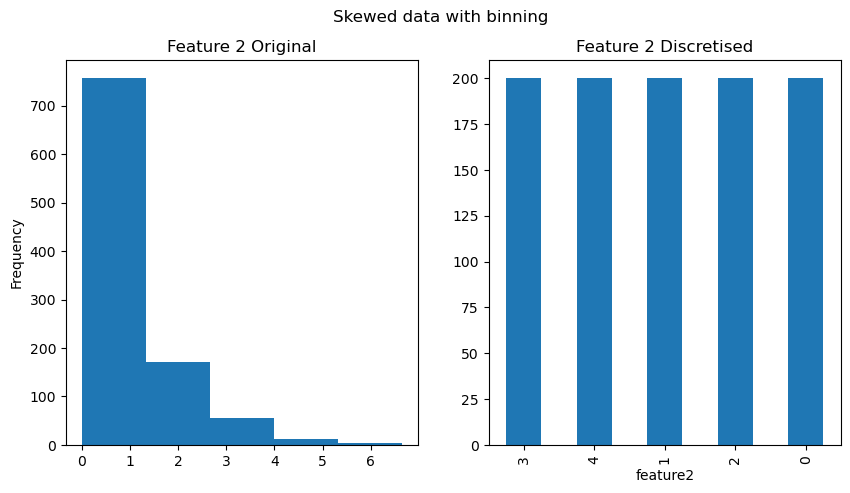

In [71]:
fig, ax=plt.subplots(figsize=(10,5),ncols=2)

data['feature2'].plot.hist(bins=disc.q,ax=ax[0])
ax[0].set_title('Feature 2 Original')

t['feature2'].value_counts().plot.bar(ax=ax[1])
ax[1].set_title('Feature 2 Discretised')

plt.suptitle('Skewed data with binning')
plt.show()